<a href="https://colab.research.google.com/github/carlosvr0/PL-SQL_REPO/blob/main/CheatSheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PL/SQL**

###Procedural Language/Structured Query Language.

---

##Estructura general de un bloque PL/SQL 











**DECLARE**

    -- Declaraciones de variables y tipos de datos

        v_numero INTEGER;

**BEGIN**

    -- Código PL/SQL

        v_numero := 10;
        IF v_numero > 5 THEN
            DBMS_OUTPUT.PUT_LINE('El número es mayor que 5.');
        ELSE
            DBMS_OUTPUT.PUT_LINE('El número es menor o igual a 5.');
        END IF;

**EXCEPTION**

    -- Manejo de excepciones

      WHEN OTHERS THEN
        DBMS_OUTPUT.PUT_LINE('Se ha producido un error: ' || SQLERRM);
    
**END;**


----

##Declaraciones de variables y constantes

**DECLARE**

    DECLARE
    
      v_numero NUMBER;
      c_numero_constante CONSTANT NUMBER := 10;
     
      v_cadena VARCHAR2(50);
      c_cadena_constante CONSTANT VARCHAR2(20) := 'Hola';
      
      v_fecha DATE;
      c_fecha_constante CONSTANT DATE := TO_DATE('01/01/2022', 'DD/MM/YYYY');
      
      v_booleano BOOLEAN;
      c_booleano_constante CONSTANT BOOLEAN := TRUE;
      
    BEGIN
      -- Código del bloque
    END;


---

##Instrucciones de control de PL/SQL

**IF-THEN-ELSE**

      DECLARE
        v_numero NUMBER := 10;
      BEGIN
        IF v_numero > 5 THEN
          DBMS_OUTPUT.PUT_LINE('El número es mayor que 5');
        ELSE
          DBMS_OUTPUT.PUT_LINE('El número es menor o igual a 5');
        END IF;
      END;



**CASE**

      DECLARE
        v_opcion VARCHAR2(1) := 'A';
      BEGIN
        CASE v_opcion
          WHEN 'A' THEN
            DBMS_OUTPUT.PUT_LINE('La opción es A');
          WHEN 'B' THEN
            DBMS_OUTPUT.PUT_LINE('La opción es B');
          ELSE
            DBMS_OUTPUT.PUT_LINE('La opción es otra');
        END CASE;
      END;



**LOOP**

      DECLARE
        v_contador NUMBER := 1;
      BEGIN
        LOOP
          DBMS_OUTPUT.PUT_LINE('Contador: ' || v_contador);
          v_contador := v_contador + 1;
          EXIT v_contador WHEN  > 5;
        END LOOP;
      END;




**FOR**

      DECLARE
        v_resultado NUMBER := 0;
      BEGIN
        FOR i IN 1..5 LOOP
          v_resultado := v_resultado + i;
        END LOOP;
        DBMS_OUTPUT.PUT_LINE('Resultado: ' || v_resultado);
      END;



**WHILE**

      DECLARE
        v_contador NUMBER := 1;
      BEGIN
        WHILE v_contador <= 5 LOOP
          DBMS_OUTPUT.PUT_LINE('Contador: ' || v_contador);
          v_contador := v_contador + 1;
        END LOOP;
      END;


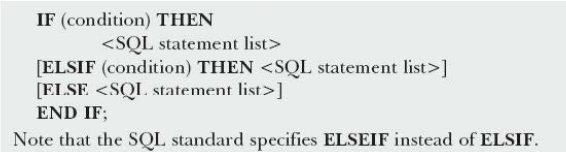

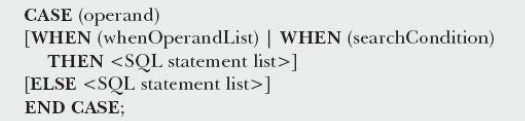

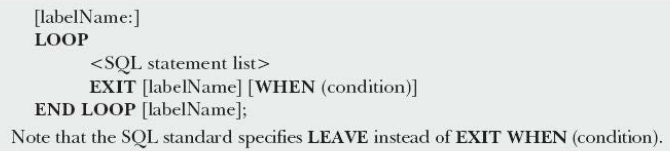

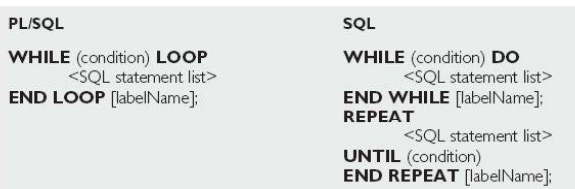

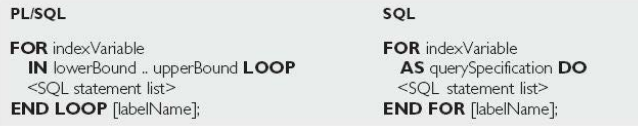

##Procedimientos y funciones

Los procedimientos y funciones son subprogramas que se utilizan para realizar una tarea específica y pueden ser llamados desde cualquier parte del código.
*   **Procedimiento**: no retorna un valor
*   **Función**: si retorna un valor




      CREATE OR REPLACE PROCEDURE mostrar_saludo (IN nombre VARCHAR2) AS
      BEGIN
        DBMS_OUTPUT.PUT_LINE('¡Hola, ' || nombre || '!');
      END;

En otro lado del código

      BEGIN
        mostrar_saludo('Juan');
      END;


---

##Excepciones



*   NO_DATA_FOUND: se produce cuando una consulta no devuelve ningún resultado.

*   TOO_MANY_ROWS: se produce cuando una consulta devuelve más de una fila de resultados.

*   DUP_VAL_ON_INDEX: se produce cuando se intenta insertar un registro con un valor duplicado en una columna que tiene una restricción de clave única.


Para manejar las excepciones que se producen durante la ejecución de un programa, se utiliza la cláusula `EXCEPTION`

```
BEGIN
  -- Código que puede producir una excepción
EXCEPTION
  -- Bloques de código para manejar las excepciones
END;
```

Dentro de los bloques de código de manejo de excepciones, se pueden utilizar las siguientes instrucciones:

- `WHEN`: se utiliza para definir una excepción específica que se desea manejar. Por ejemplo:
  ```
  EXCEPTION
    WHEN NO_DATA_FOUND THEN
      DBMS_OUTPUT.PUT_LINE('No se encontraron resultados.');
  ```
- `OTHERS`: se utiliza para definir un bloque de código que se ejecutará en caso de que se produzca una excepción que no esté siendo manejada de forma explícita. Por ejemplo:
  ```
  EXCEPTION
    WHEN OTHERS THEN
      DBMS_OUTPUT.PUT_LINE('Se produjo un error inesperado.');
  ```

---


**EJEMPLO**

```
DECLARE
  saldo NUMBER := 1000;
  cantidad_retiro NUMBER := 2000;
BEGIN
  IF cantidad_retiro > saldo THEN
    RAISE_APPLICATION_ERROR(-20001, 'No hay suficiente saldo en la cuenta.');
  ELSE
    saldo := saldo - cantidad_retiro;
    DBMS_OUTPUT.PUT_LINE('Retiro exitoso. Nuevo saldo: ' || saldo);
  END IF;
EXCEPTION
  WHEN OTHERS THEN
    DBMS_OUTPUT.PUT_LINE('Se produjo un error: ' || SQLCODE || ' - ' || SQLERRM);
END;
```

En este ejemplo, se intenta realizar un retiro de una cantidad mayor al saldo disponible. Para manejar esta situación, se utiliza la instrucción `RAISE_APPLICATION_ERROR` para generar una excepción personalizada con un código y un mensaje de error específicos. Luego, se utiliza la cláusula `EXCEPTION` para definir un bloque de código que se ejecutará en caso de que se produzca cualquier excepción. Dentro de este bloque, se utiliza la función `DBMS_OUTPUT.PUT_LINE` para mostrar

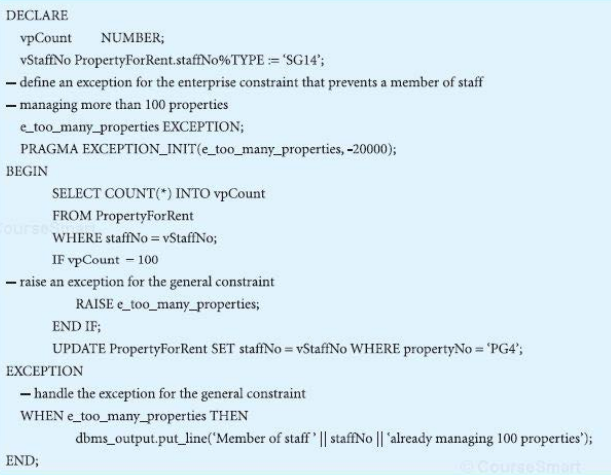

##Cursores de Sql


En SQL, un cursor es una estructura que permite procesar filas de una tabla o de los resultados de una consulta una a una. Los cursores son útiles cuando se necesita procesar grandes cantidades de datos o cuando se necesitan procesar los datos de forma individual.

    DECLARE
      CURSOR c_empleados IS
        SELECT nombre, salario FROM empleados;
      v_nombre empleados.nombre%TYPE;
      v_salario empleados.salario%TYPE;
    BEGIN
      OPEN c_empleados;
      LOOP
        FETCH c_empleados INTO v_nombre, v_salario;
        EXIT WHEN c_empleados%NOTFOUND;
        DBMS_OUTPUT.PUT_LINE('El empleado ' || v_nombre || ' tiene un salario de ' || v_salario);
      END LOOP;
      CLOSE c_empleados;
    END;


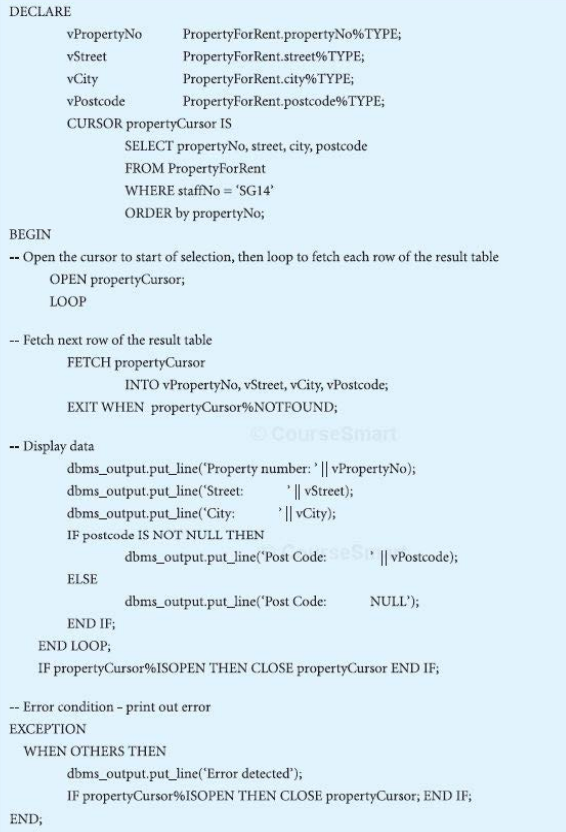

##¿Qué son los triggers y para qué pueden ser utilizados?

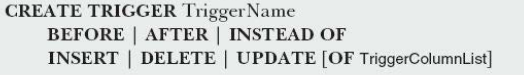

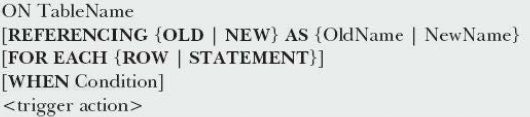

## Diferencias entre los triggers  BEFORE, AFTER, e  INSTEAD OF

En SQL, existen tres tipos principales de triggers que se pueden utilizar: BEFORE, AFTER e INSTEAD OF. Cada uno de ellos se ejecuta en un momento diferente en relación con la operación en la tabla y puede tener diferentes usos y efectos.

- `BEFORE`: Este tipo de trigger se ejecuta antes de que se produzca la operación en la tabla, lo que significa que aún no se ha modificado el estado de la tabla. Por lo tanto, se puede utilizar para validar datos, realizar cálculos previos o modificar los valores que se van a insertar o actualizar en la tabla. Si se produce un error en el trigger, la operación en la tabla se cancela.

A continuación, se muestra un ejemplo de un trigger BEFORE que se utiliza para validar datos:

```
CREATE OR REPLACE TRIGGER tr_validar_salario
BEFORE INSERT OR UPDATE OF salario ON empleados
FOR EACH ROW
BEGIN
   IF :NEW.salario < 0 THEN
      RAISE_APPLICATION_ERROR(-20001, 'El salario debe ser mayor o igual a cero');
   END IF;
END;
```

- `AFTER`: Este tipo de trigger se ejecuta después de que se ha producido la operación en la tabla, lo que significa que ya se ha modificado el estado de la tabla. Por lo tanto, se puede utilizar para auditar cambios, realizar cálculos posteriores o enviar notificaciones después de que se haya completado la operación.

A continuación, se muestra un ejemplo de un trigger AFTER que se utiliza para auditar cambios:

```
CREATE OR REPLACE TRIGGER tr_auditar_empleados
AFTER INSERT OR UPDATE OR DELETE ON empleados
FOR EACH ROW
BEGIN
   INSERT INTO auditoria_empleados (accion, empleado_id, fecha) VALUES (
      CASE 
         WHEN INSERTING THEN 'INSERT'
         WHEN UPDATING THEN 'UPDATE'
         WHEN DELETING THEN 'DELETE'
      END,
      :NEW.empleado_id,
      SYSDATE
   );
END;
```

- `INSTEAD OF`: Este tipo de trigger se utiliza en las vistas y se ejecuta en lugar de la operación en la tabla subyacente. Por lo tanto, se puede utilizar para modificar los datos que se muestran en la vista, realizar validaciones adicionales o ejecutar operaciones en tablas diferentes.

A continuación, se muestra un ejemplo de un trigger INSTEAD OF que se utiliza para modificar los datos que se muestran en una vista:

```
CREATE OR REPLACE TRIGGER tr_modificar_vista
INSTEAD OF INSERT OR UPDATE OR DELETE ON vista_empleados
FOR EACH ROW
BEGIN
   IF :NEW.salario < 0 THEN
      RAISE_APPLICATION_ERROR(-20001, 'El salario debe ser mayor o igual a cero');
   END IF;
   
   -- Realizar la operación en la tabla subyacente
   -- ...
   
   -- Actualizar la vista
   -- ...
END;
```
